In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import shapefile
from shapely.geometry import Polygon
from descartes.patch import PolygonPatch

ems = pd.read_csv('./data/mfdems.csv') # EMS Calls for Service Milwaukee
ald_shp = shapefile.Reader("./shape/ald2018/alderman")
## RACIAL DEMOGRAPHICS
race_dem = pd.read_csv('./data/finalaldermanicdistrictdemogra-2.csv')
print(race_dem.head())

  Aldermanic\r\nDistrict Total\r\nPopulation  \
0                      1              38,515   
1                      2              41,707   
2                      3              39,492   
3                      4              38,607   
4                      5              38,953   

  White Population\r\nVoting Age (%) Black Population\r\nVoting Age (%)  \
0                              12.9%                              82.3%   
1                              21.3%                              67.3%   
2                              84.2%                               6.9%   
3                              57.5%                              29.8%   
4                              58.7%                              33.1%   

  Hispanic Population\r\nVoting Age (%) Asian Population\r\nVoting Age (%)  
0                                  2.7%                               0.9%  
1                                  3.2%                               6.9%  
2                            

In [2]:
# plots a comparison of MKE aldermanic districts based on the input parameter, call_type
def plot_df_on_mke_ald_map(df):
    fig = plt.figure(figsize=(12,10))
    plt.title(df.columns[0])
    ax = plt.axes()
    ax.set_aspect('equal')

    for i, shape in enumerate(ald_shp.shapes()):
        # define polygon fill color (facecolor) RGB values:
        R = df.pct[float(ald_shp.record(i)[1])] / max(df.pct) # percentage value for alderman district
        G = 0.1
        B = 0.1
        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0=shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)
                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=1.0, zorder=2)
                ax.add_patch(patch)
        # annotate the shape with aldermanic district number
        center_x = shape.bbox[0]+((shape.bbox[2]-shape.bbox[0])/2)
        center_y = shape.bbox[1]+((shape.bbox[3]-shape.bbox[1])/2)
        ax.annotate(ald_shp.record(i)[1],xy=(center_x,center_y),color='tan',
                    ha='center',va='center',fontsize=21)
    plt.xlim(ald_shp.bbox[0],ald_shp.bbox[2])
    plt.ylim(ald_shp.bbox[1],ald_shp.bbox[3])
    plt.axis('off')
    fig.savefig('./images/EMS_' + df.columns[0] + '_2018_alddist.png')

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


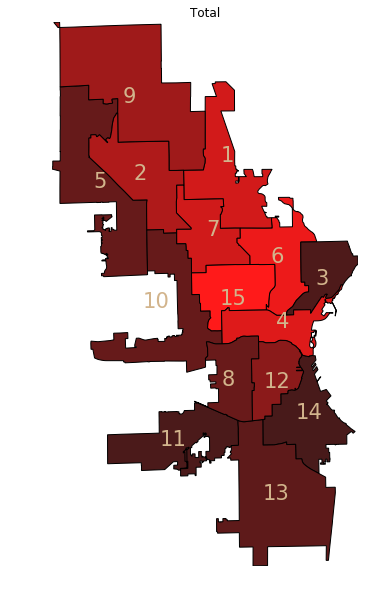

In [3]:
# MKE EMS calls - total
df = ems[['Aldermanic District','Final Call for Service Type']].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
df.columns = ['Total']
df['pct'] = df['Total'] / sum(df['Total'])
plot_df_on_mke_ald_map(df)

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


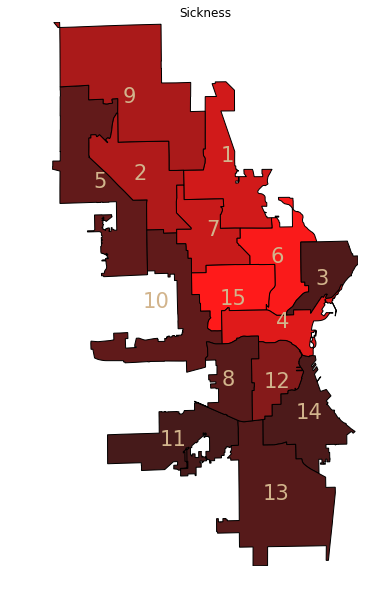

In [4]:
# MKE EMS calls related to sick ppl
df = ems[ems['Final Call for Service Type']=='Sick Person (Specific Diagnosis)'].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
df.columns = ['Sickness']
df['pct'] = df['Sickness'] / sum(df['Sickness'])
plot_df_on_mke_ald_map(df)

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


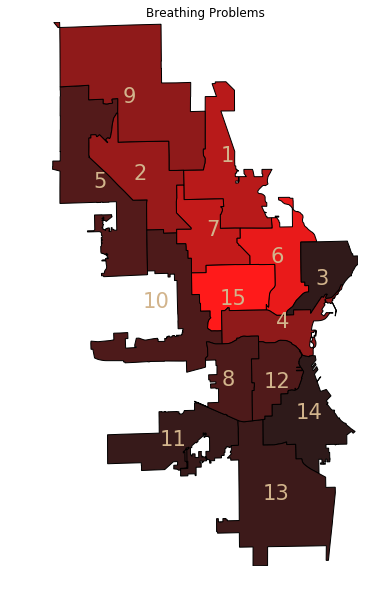

In [5]:
# MKE EMS calls related to breathing problems
df = ems[ems['Final Call for Service Type']=='Breathing Problems'].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
df.columns = ['Breathing Problems']
df['pct'] = df['Breathing Problems'] / sum(df['Breathing Problems'])
plot_df_on_mke_ald_map(df)

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


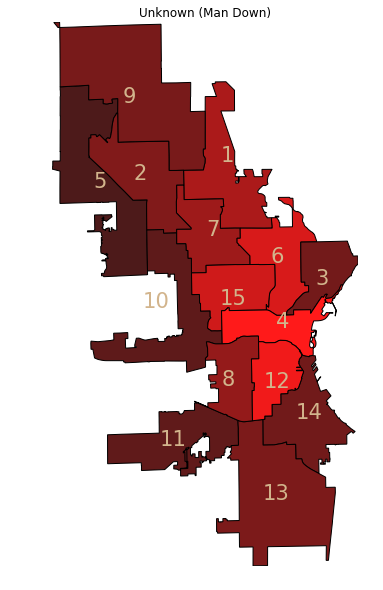

In [6]:
# MKE EMS calls related to breathing problems
df = ems[ems['Final Call for Service Type']=='Unknown Problem (Man Down)'].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
df.columns = ['Unknown (Man Down)']
df['pct'] = df['Unknown (Man Down)'] / sum(df['Unknown (Man Down)'])
plot_df_on_mke_ald_map(df)

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


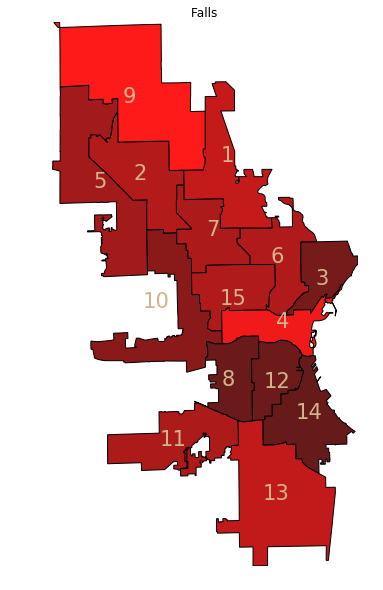

In [7]:
# MKE EMS calls related to breathing problems
df = ems[ems['Final Call for Service Type']=='Falls'].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
df.columns = ['Falls']
df['pct'] = df['Falls'] / sum(df['Falls'])
plot_df_on_mke_ald_map(df)

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


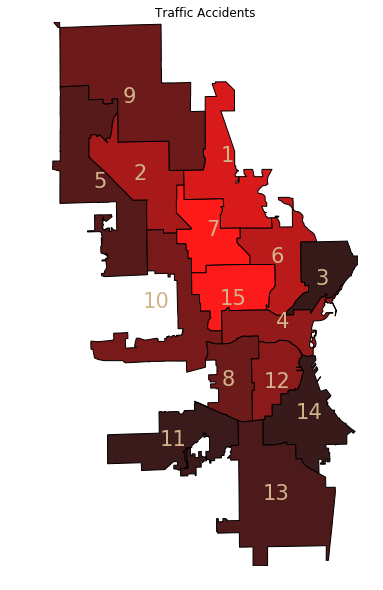

In [8]:
# MKE EMS calls related to breathing problems
df = ems[ems['Final Call for Service Type']=='Traffic/Transportation Accidents'].groupby(['Aldermanic District'], as_index=True).agg(['count'])['Final Call for Service Type']
df.columns = ['Traffic Accidents']
df['pct'] = df['Traffic Accidents'] / sum(df['Traffic Accidents'])
plot_df_on_mke_ald_map(df)

C:\Users\Peter\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


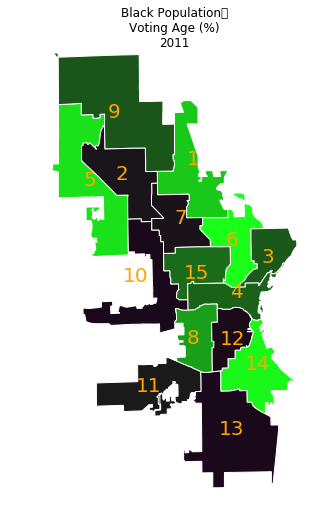

In [9]:
pct = race_dem['Black Population\r\nVoting Age (%)'].str[:-1].astype(float)
#plot 
fig = plt.figure(figsize=(10,8))
plt.title(pct.name+'\n2011')
ax = plt.axes()
ax.set_aspect('equal')
irec = 0

for shape in ald_shp.shapes():
    # define polygon fill color (facecolor) RGB values:
    R = 0.1
    G = pct[float(ald_shp.record(irec)[1])] / max(pct) # percentage value for alderman district
    B = 0.1
    # check number of parts (could use MultiPolygon class of shapely?)
    nparts = len(shape.parts) # total parts
    if nparts == 1:
        polygon = Polygon(shape.points)
        patch = PolygonPatch(polygon, facecolor=[R,G,B], edgecolor=[1,1,1], alpha=1.0, zorder=2)
        ax.add_patch(patch)
    else: # loop over parts of each shape, plot separately
        for ip in range(nparts): # loop over parts, plot separately
            i0=shape.parts[ip]
            if ip < nparts-1:
                i1 = shape.parts[ip+1]-1
            else:
                i1 = len(shape.points)
            polygon = Polygon(shape.points[i0:i1+1])
            patch = PolygonPatch(polygon, facecolor=[R,G,B], edgecolor=[1,1,1], alpha=1.0, zorder=2)
            ax.add_patch(patch)
    # annotate the shape with aldermanic district number
    center_x = shape.bbox[0]+((shape.bbox[2]-shape.bbox[0])/2)
    center_y = shape.bbox[1]+((shape.bbox[3]-shape.bbox[1])/2)
    ax.annotate(ald_shp.record(irec)[1],xy=(center_x,center_y),color='orange',
                ha='center',va='center',fontsize=20)
    # increment record number
    irec = irec+1

plt.xlim(ald_shp.bbox[0],ald_shp.bbox[2])
plt.ylim(ald_shp.bbox[1],ald_shp.bbox[3])
plt.axis('off')
fig.savefig('./images/BlackPopulation_PctVotingAge_2011_alddist.png')

In [10]:
##TODO: compare number of elderly with number of falls by aldermanic district


In [11]:
dime = shapefile.Reader('./shape/dime/dime')
dime.fields

[('DeletionFlag', 'C', 1, 0),
 ['LENGTH', 'F', 19, 11],
 ['RCD_NBR', 'N', 10, 0],
 ['SEG_L_TYPE', 'C', 10, 0],
 ['DIR', 'C', 1, 0],
 ['STREET', 'C', 18, 0],
 ['STTYPE', 'C', 2, 0],
 ['LO_ADD_L', 'N', 10, 0],
 ['HI_ADD_L', 'N', 10, 0],
 ['LO_ADD_R', 'N', 10, 0],
 ['HI_ADD_R', 'N', 10, 0]]

In [12]:
# plots a comparison of MKE aldermanic districts based on the input parameter, call_type
def plot_mke_street_map():
    plt.figure(figsize=(12,10))
    ax = plt.axes()
    ax.set_aspect('equal')
    irec = 0

    for shape in list(dime.iterShapes()):
        #rec = dime.record(irec)
        # define polygon fill color (facecolor) RGB values:
        #R = ems_call.pct[float(rec[1])] / max(ems_call.pct) # percentage value for alderman district
        R = float(irec) / len(dime.shapes())
        G = 0.1
        B = 0.1
        # check number of parts (could use MultiPolygon class of shapely?)
        nparts = len(shape.parts) # total parts
        if nparts == 1:
            polygon = Polygon(shape.points)
            patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=1.0, zorder=2)
            ax.add_patch(patch)
        else: # loop over parts of each shape, plot separately
            for ip in range(nparts): # loop over parts, plot separately
                i0=shape.parts[ip]
                if ip < nparts-1:
                    i1 = shape.parts[ip+1]-1
                else:
                    i1 = len(shape.points)
                polygon = Polygon(shape.points[i0:i1+1])
                patch = PolygonPatch(polygon, facecolor=[R,G,B], alpha=1.0, zorder=2)
                ax.add_patch(patch)
        center_x = shape.bbox[0]+((shape.bbox[2]-shape.bbox[0])/2)
        center_y = shape.bbox[1]+((shape.bbox[3]-shape.bbox[1])/2)
        ax.annotate(rec[1],xy=(center_x,center_y),color='tan',
                    ha='center',va='center',fontsize=22)
        irec = irec+1
    
    plt.xlim(dime.bbox[0],dime.bbox[2])
    plt.ylim(dime.bbox[1],dime.bbox[3])
    plt.axis('off')


ValueError: A LinearRing must have at least 3 coordinate tuples

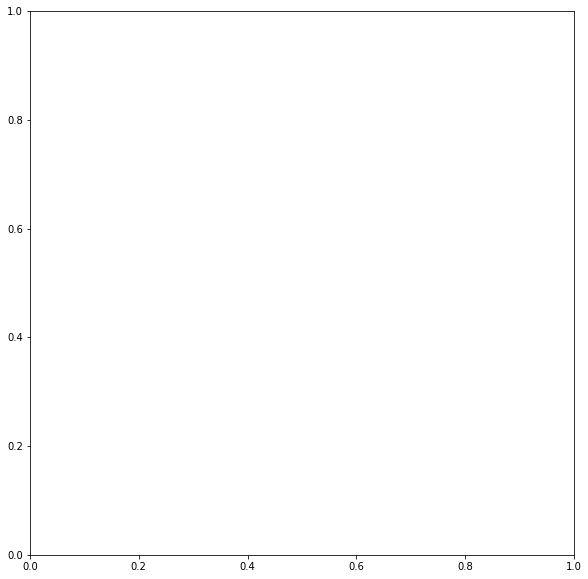

In [13]:
plot_mke_street_map()